# Update Webmaps
Short snippets for updating webmaps!

In [1]:
import json
from arcgis.gis import GIS, Item

In [2]:
gis = GIS(username="mpayson_startups")

Enter password:  ········


## Change basemap

Replaces a webmap basemap with **[an existing basemap](https://www.arcgis.com/home/group.html?id=30de8da907d240a0bccd5ad3ff25ef4a&view=list&focus=maps-webmaps#content)** in ArcGIS Online.

<Item title:"Esri Partner Tools Sample Map" type:Web Map owner:mpayson_startups>
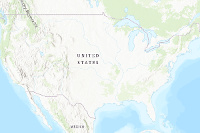

In [3]:
map_item = Item(gis, 'b62f503504f646d1bf245f96824620a8')
map_item

In [4]:
# colored pencil basemap
bm_item = Item(gis, '826498a48bd0424f9c9315214f2165d4')

map_dict = dict(map_item.get_data())
bm_dict = dict(bm_item.get_data())

map_dict['baseMap'] = bm_dict['baseMap']

map_item.update(data=json.dumps(map_dict))

True